Split training data into correct folders
--------------------------------------

In [2]:
sort_data = None

%matplotlib inline
from __future__ import division,print_function
import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt
from utils import *
from vgg16 import Vgg16

path = 'data/invasive-species-monitoring/'
labels = np.genfromtxt(path + 'train_labels.csv', dtype=None, delimiter=',', names=True)

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


In [4]:
def cpRandomJpgs(frm, to, num):
    %mkdir -p {path + to}
    g = glob(path + frm + '/*.jpg')
    shuf = np.random.permutation(g)
    for i in range(200):
        %cp {shuf[i]} {path + to + '/.'}

def mvRandomJpgs(frm, to, num):
    %mkdir -p {path + to}
    g = glob(path + frm + '/*.jpg')
    shuf = np.random.permutation(g)
    for i in range(200):
        %mv {shuf[i]} {path + to + '/.'}
    
def formatData():
    %mkdir {path + 'train/non-invasive'}
    %mkdir {path + 'train/invasive'}
    
    for record in labels:
        folder = 'invasive/' if np.int(record[1]) == 1 else 'non-invasive/'
        %cp {path}train/{record[0]}.jpg {path}train/{folder}{record[0]}.jpg
    
    mvRandomJpgs('train/invasive', 'valid/invasive', 200)
    mvRandomJpgs('train/non-invasive', 'valid/non-invasive', 200)
    cpRandomJpgs('train/invasive', 'sample/train/invasive', 10)
    cpRandomJpgs('train/non-invasive', 'sample/train/non-invasive', 10)
    cpRandomJpgs('valid/invasive', 'sample/valid/invasive', 10)
    cpRandomJpgs('valid/non-invasive', 'sample/valid/non-invasive', 10)
    cpRandomJpgs('test', 'sample/test/unknown', 10)

    # Need to also move test data to a label "unknown"
    %mkdir -p {path + '/test/unknown'}
    %cp {path + 'test/*.jpg'} {path + 'test/unknown/.'}

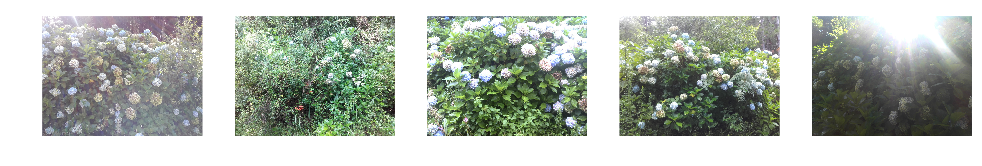

In [14]:
if sort_data:
    formatData()
    
def show5Random(folder):
    g = glob(path + folder + '/*.jpg')
    shuf = np.random.permutation(g)
    plots([image.load_img(shuf[i]) for i in range(5)])
    
# Show a few invasive species
show5Random('valid/invasive')


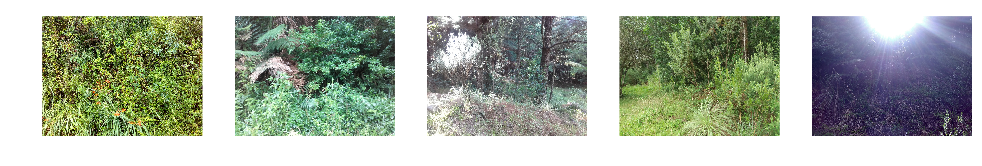

In [15]:
# Show a few non-invasive species
show5Random('valid/non-invasive')

In [37]:
vgg = Vgg16()

#Set constants. You can experiment with no_of_epochs to improve the model
batch_size=64

In [38]:
model = vgg_ft(2)

In [39]:
#final_path = path + 'sample/'
final_path = path

In [40]:
model_path = final_path + 'models/'
if not os.path.exists(model_path): os.mkdir(model_path)

In [41]:
#Finetune the model
batches = vgg.get_batches(path + '/train', batch_size=batch_size)
val_batches = vgg.get_batches(path + '/valid', batch_size=batch_size*2)

vgg.finetune(batches)

Found 1895 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [42]:
vgg.model.optimizer.lr = 0.0001

In [43]:
#Notice we are passing in the validation dataset to the fit() method
#For each epoch we test our model against the validation set
latest_weights_filename = None
#vgg.model.load_weights(model_path + '/resultsft4.h5')
no_of_epochs=2
for epoch in range(2):
    print('Running epoch: %d' % epoch)
    vgg.fit(batches, val_batches, nb_epoch=1)
    latest_weights_filename = 'finetuned%d.h5' % epoch
    vgg.model.save_weights(model_path + latest_weights_filename)
print("Completed %s fit operations" % 2)

Running epoch: 0
Epoch 1/1
1895/1895 [==============================] - 89s - loss: 0.7936 - acc: 0.6770 - val_loss: 0.3827 - val_acc: 0.8150
Running epoch: 1
Epoch 1/1
1895/1895 [==============================] - 100s - loss: 0.5899 - acc: 0.7520 - val_loss: 0.3187 - val_acc: 0.8700
Running epoch: 2
Epoch 1/1
1895/1895 [==============================] - 98s - loss: 0.4807 - acc: 0.8116 - val_loss: 0.3019 - val_acc: 0.8925
Running epoch: 3
Epoch 1/1
1895/1895 [==============================] - 93s - loss: 0.5007 - acc: 0.8032 - val_loss: 0.2935 - val_acc: 0.8925
Running epoch: 4
Epoch 1/1
1895/1895 [==============================] - 91s - loss: 0.4463 - acc: 0.8174 - val_loss: 0.2810 - val_acc: 0.8950
Running epoch: 5
Epoch 1/1
1895/1895 [==============================] - 94s - loss: 0.4351 - acc: 0.8232 - val_loss: 0.2759 - val_acc: 0.9000
Running epoch: 6
Epoch 1/1
1895/1895 [==============================] - 98s - loss: 0.4618 - acc: 0.8227 - val_loss: 0.2543 - val_acc: 0.9025
Runni

In [44]:
vgg.model.load_weights(model_path + 'finetuned2.h5')

In [46]:
#Notice we are passing in the validation dataset to the fit() method
#For each epoch we test our model against the validation set
vgg.model.optimizer.lr = 0.001
no_of_epochs=4
for epoch in range(no_of_epochs):
    print('Running epoch: %d' % epoch)
    vgg.fit(batches, val_batches, nb_epoch=1)
    latest_weights_filename = '/finetuned_2_%d.h5' % epoch
    vgg.model.save_weights(model_path + latest_weights_filename)
print("Completed %s fit operations" % no_of_epochs)

Running epoch: 0
Epoch 1/1
1895/1895 [==============================] - 88s - loss: 0.3934 - acc: 0.8464 - val_loss: 0.2846 - val_acc: 0.8775
Running epoch: 1
Epoch 1/1
1895/1895 [==============================] - 90s - loss: 0.3661 - acc: 0.8559 - val_loss: 0.2071 - val_acc: 0.9250
Running epoch: 2
Epoch 1/1
1895/1895 [==============================] - 104s - loss: 0.3543 - acc: 0.8459 - val_loss: 0.2474 - val_acc: 0.9050
Running epoch: 3
Epoch 1/1
1895/1895 [==============================] - 92s - loss: 0.3657 - acc: 0.8549 - val_loss: 0.2247 - val_acc: 0.9200
Completed 4 fit operations


In [47]:
vgg.model.load_weights(model_path + 'finetuned_2_3.h5')
#Notice we are passing in the validation dataset to the fit() method
#For each epoch we test our model against the validation set
vgg.model.optimizer.lr = 0.1
no_of_epochs=2
for epoch in range(no_of_epochs):
    print('Running epoch: %d' % epoch)
    vgg.fit(batches, val_batches, nb_epoch=1)
    latest_weights_filename = '/finetuned_3_%d.h5' % epoch
    vgg.model.save_weights(model_path + latest_weights_filename)
print("Completed %s fit operations" % no_of_epochs)

Running epoch: 0
Epoch 1/1
1895/1895 [==============================] - 98s - loss: 0.3534 - acc: 0.8507 - val_loss: 0.2352 - val_acc: 0.9200
Running epoch: 1
Epoch 1/1
1895/1895 [==============================] - 97s - loss: 0.3486 - acc: 0.8718 - val_loss: 0.2174 - val_acc: 0.9175
Completed 2 fit operations


In [49]:
def fit(id, num_epochs, lr):
    vgg.model.optimizer.lr = lr
    no_of_epochs=num_epochs
    for epoch in range(no_of_epochs):
        print('Running epoch: %d' % epoch)
        vgg.fit(batches, val_batches, nb_epoch=1)
        latest_weights_filename = '/finetuned_' + str(id) + '_%d.h5' % epoch
        vgg.model.save_weights(model_path + latest_weights_filename)
    print("Completed %s fit operations" % no_of_epochs)
    
fit(4, 8, 0.01)

Running epoch: 0
Epoch 1/1
1895/1895 [==============================] - 95s - loss: 0.3054 - acc: 0.8691 - val_loss: 0.2323 - val_acc: 0.9050
Running epoch: 1
Epoch 1/1
1895/1895 [==============================] - 98s - loss: 0.3406 - acc: 0.8607 - val_loss: 0.2035 - val_acc: 0.9250
Running epoch: 2
Epoch 1/1
1895/1895 [==============================] - 105s - loss: 0.3261 - acc: 0.8665 - val_loss: 0.2158 - val_acc: 0.9175
Running epoch: 3
Epoch 1/1
1895/1895 [==============================] - 98s - loss: 0.3163 - acc: 0.8681 - val_loss: 0.2079 - val_acc: 0.9250
Running epoch: 4
Epoch 1/1
1895/1895 [==============================] - 90s - loss: 0.3117 - acc: 0.8765 - val_loss: 0.1968 - val_acc: 0.9250
Running epoch: 5
Epoch 1/1
1895/1895 [==============================] - 96s - loss: 0.3113 - acc: 0.8670 - val_loss: 0.2013 - val_acc: 0.9175
Running epoch: 6
Epoch 1/1
1895/1895 [==============================] - 91s - loss: 0.3025 - acc: 0.8744 - val_loss: 0.1935 - val_acc: 0.9350
Runni

In [50]:
fit(5, 12, 0.001)
fit(6, 14, 0.0001)

Running epoch: 0
Epoch 1/1
1895/1895 [==============================] - 89s - loss: 0.3260 - acc: 0.8675 - val_loss: 0.1685 - val_acc: 0.9400
Running epoch: 1
Epoch 1/1
1895/1895 [==============================] - 93s - loss: 0.2985 - acc: 0.8776 - val_loss: 0.1914 - val_acc: 0.9225
Running epoch: 2
Epoch 1/1
1895/1895 [==============================] - 91s - loss: 0.3074 - acc: 0.8802 - val_loss: 0.1980 - val_acc: 0.9225
Running epoch: 3
Epoch 1/1
1895/1895 [==============================] - 97s - loss: 0.2963 - acc: 0.8770 - val_loss: 0.2004 - val_acc: 0.9125
Running epoch: 4
Epoch 1/1
1895/1895 [==============================] - 91s - loss: 0.3160 - acc: 0.8776 - val_loss: 0.1641 - val_acc: 0.9375
Running epoch: 5
Epoch 1/1
1895/1895 [==============================] - 102s - loss: 0.2816 - acc: 0.8818 - val_loss: 0.2042 - val_acc: 0.9175
Running epoch: 6
Epoch 1/1
1895/1895 [==============================] - 98s - loss: 0.2956 - acc: 0.8776 - val_loss: 0.1919 - val_acc: 0.9275
Runni

Create prediction csv
---------------------

In [66]:
vgg.model.load_weights(model_path + 'finetuned_6_7.h5')

In [67]:
%config IPCompleter.greedy=True 
batches, preds = vgg.test(path + 'test')

Found 1531 images belonging to 1 classes.


In [68]:
preds[:5]

array([[ 0.9874,  0.0126],
       [ 0.0436,  0.9564],
       [ 0.0403,  0.9597],
       [ 0.9782,  0.0218],
       [ 0.5739,  0.4261]], dtype=float32)

In [69]:
batches.filenames[:5]

['unknown/779.jpg',
 'unknown/1261.jpg',
 'unknown/878.jpg',
 'unknown/552.jpg',
 'unknown/400.jpg']

In [70]:
results = zip(batches.filenames, preds)
results[:5]

[('unknown/779.jpg', array([ 0.9874,  0.0126], dtype=float32)),
 ('unknown/1261.jpg', array([ 0.0436,  0.9564], dtype=float32)),
 ('unknown/878.jpg', array([ 0.0403,  0.9597], dtype=float32)),
 ('unknown/552.jpg', array([ 0.9782,  0.0218], dtype=float32)),
 ('unknown/400.jpg', array([ 0.5739,  0.4261], dtype=float32))]

In [71]:
import re

def format(x):
    id = re.sub('unknown/([0-9]+)\.jpg', r'\1', x[0])
    return [np.int(id), np.float(x[1][0])]
    
formattedResults = np.array(map(format, results))
formattedResults[:5]

array([[  7.7900e+02,   9.8741e-01],
       [  1.2610e+03,   4.3640e-02],
       [  8.7800e+02,   4.0314e-02],
       [  5.5200e+02,   9.7820e-01],
       [  4.0000e+02,   5.7391e-01]])

In [72]:
np.savetxt('data/invasive-species-monitoring/jp_invasive.csv', formattedResults, fmt='%d,%.5f', delimiter=',', header='name,invasive', comments='')

In [73]:
from IPython.display import FileLink
FileLink('data/invasive-species-monitoring/jp_invasive.csv')

/home/ubuntu/fastai/deeplearning1/nbs/data/invasive-species-monitoring/jp_invasive.csv